#### Handle Missing values

Missing values are a common issue in datasets and can arise for various reasons, such as data entry errors or unavailabilty of certain information. If not addressed, missing values can lead to biased results or reduce the accuracy of your model

In [18]:
import pandas as pd
import numpy as np
import matplotlib_inline as plt

import missingno as msno



In [2]:
df = pd.read_csv("renewable_energy_projects_dirty.csv")
df.head()

,Project_ID,Project_Name,Country,Capacity_MW,Start_Year,Status,Estimated_Cost_MillionUSD,CO2_Reduction_tons_per_year
0,101,Kainji Solar Expansion,Nigeria,50.0,2020.0,Operational,75.0,NaN
1,102,Lekki Wind Farm,Nigeria,NaN,2021.0,Under Construction,120.0,85000.0
2,103,Bauchi Biomass Plant,Nigeria,12.0,NaN,Planning,NaN,15000.0
3,104,Nasarawa Mini‑Hydro,Nigeria,5.0,2019.0,NaN,18.0,7000.0
4,105,Abuja Solar Rooftop Program,Nigeria,3.5,2023.0,Operational,5.0,NaN


<Axes: >

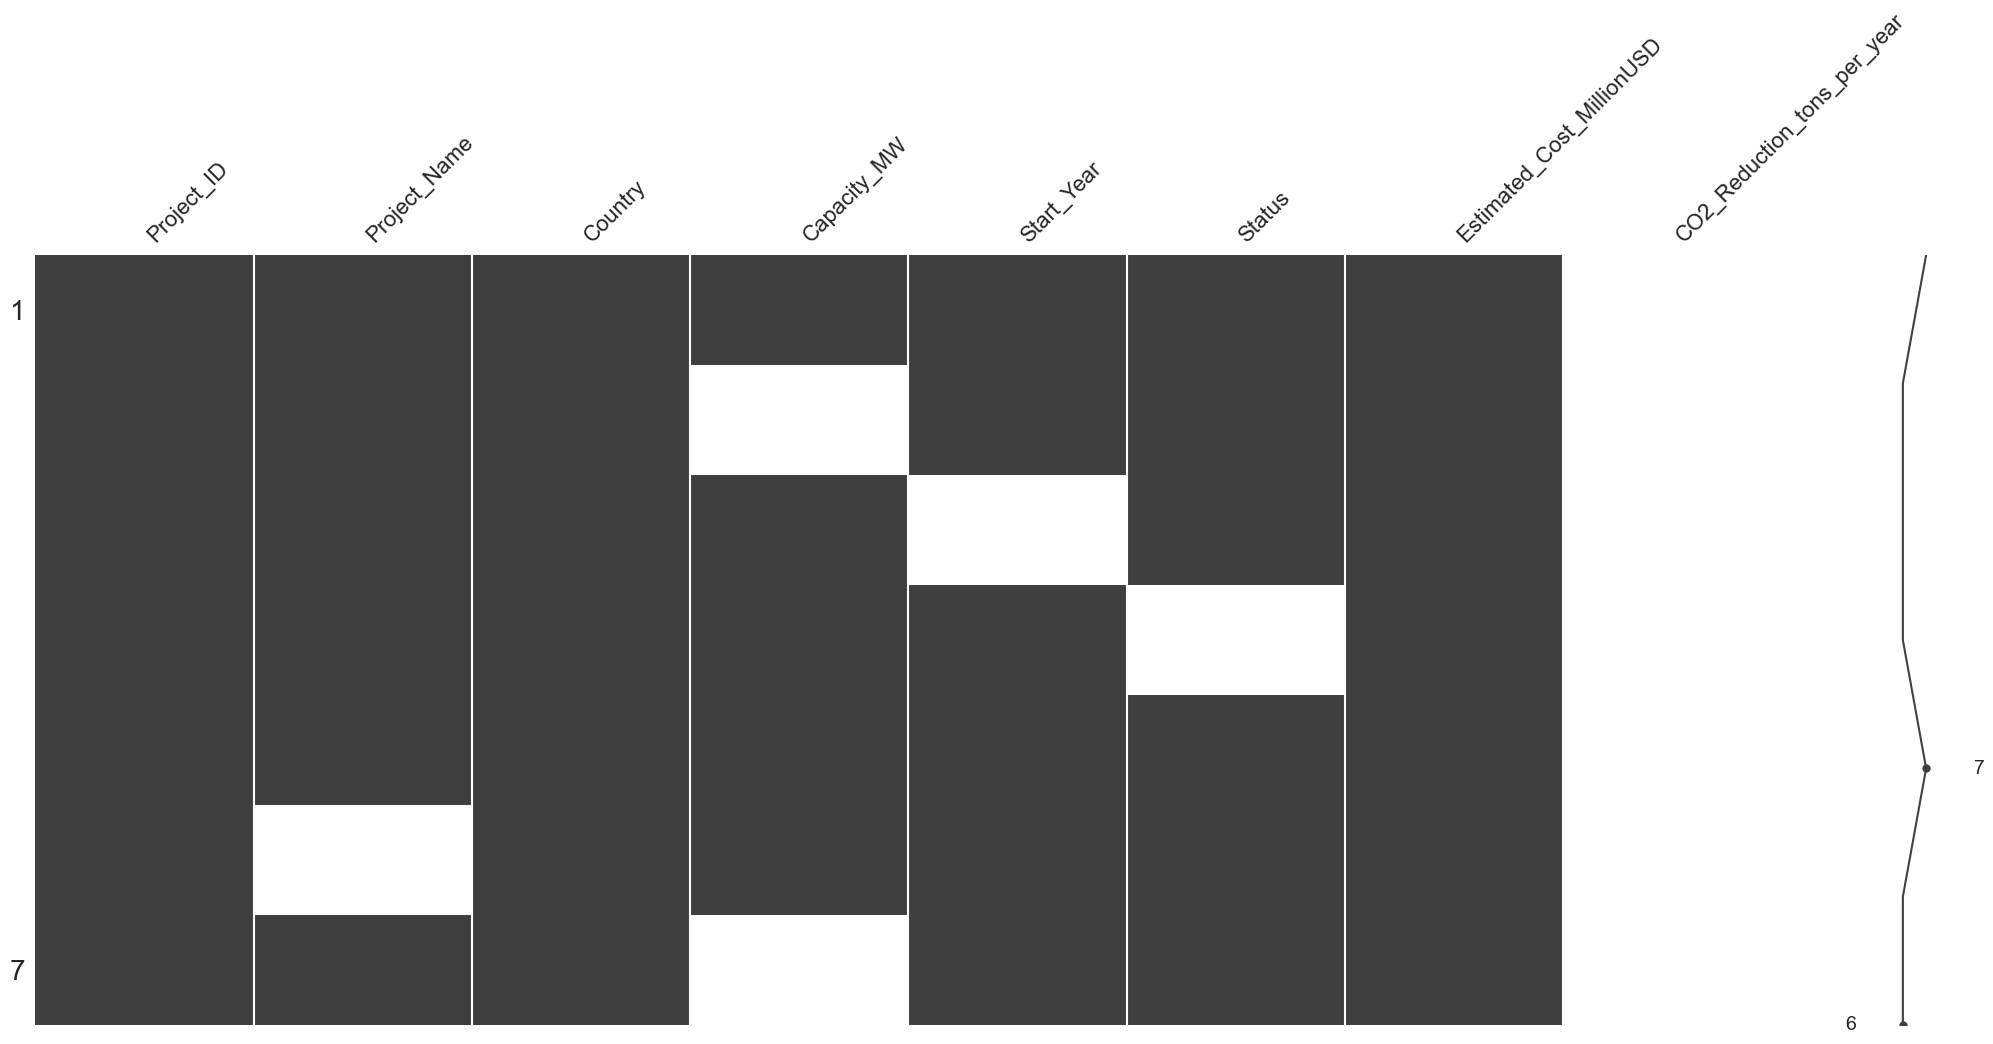

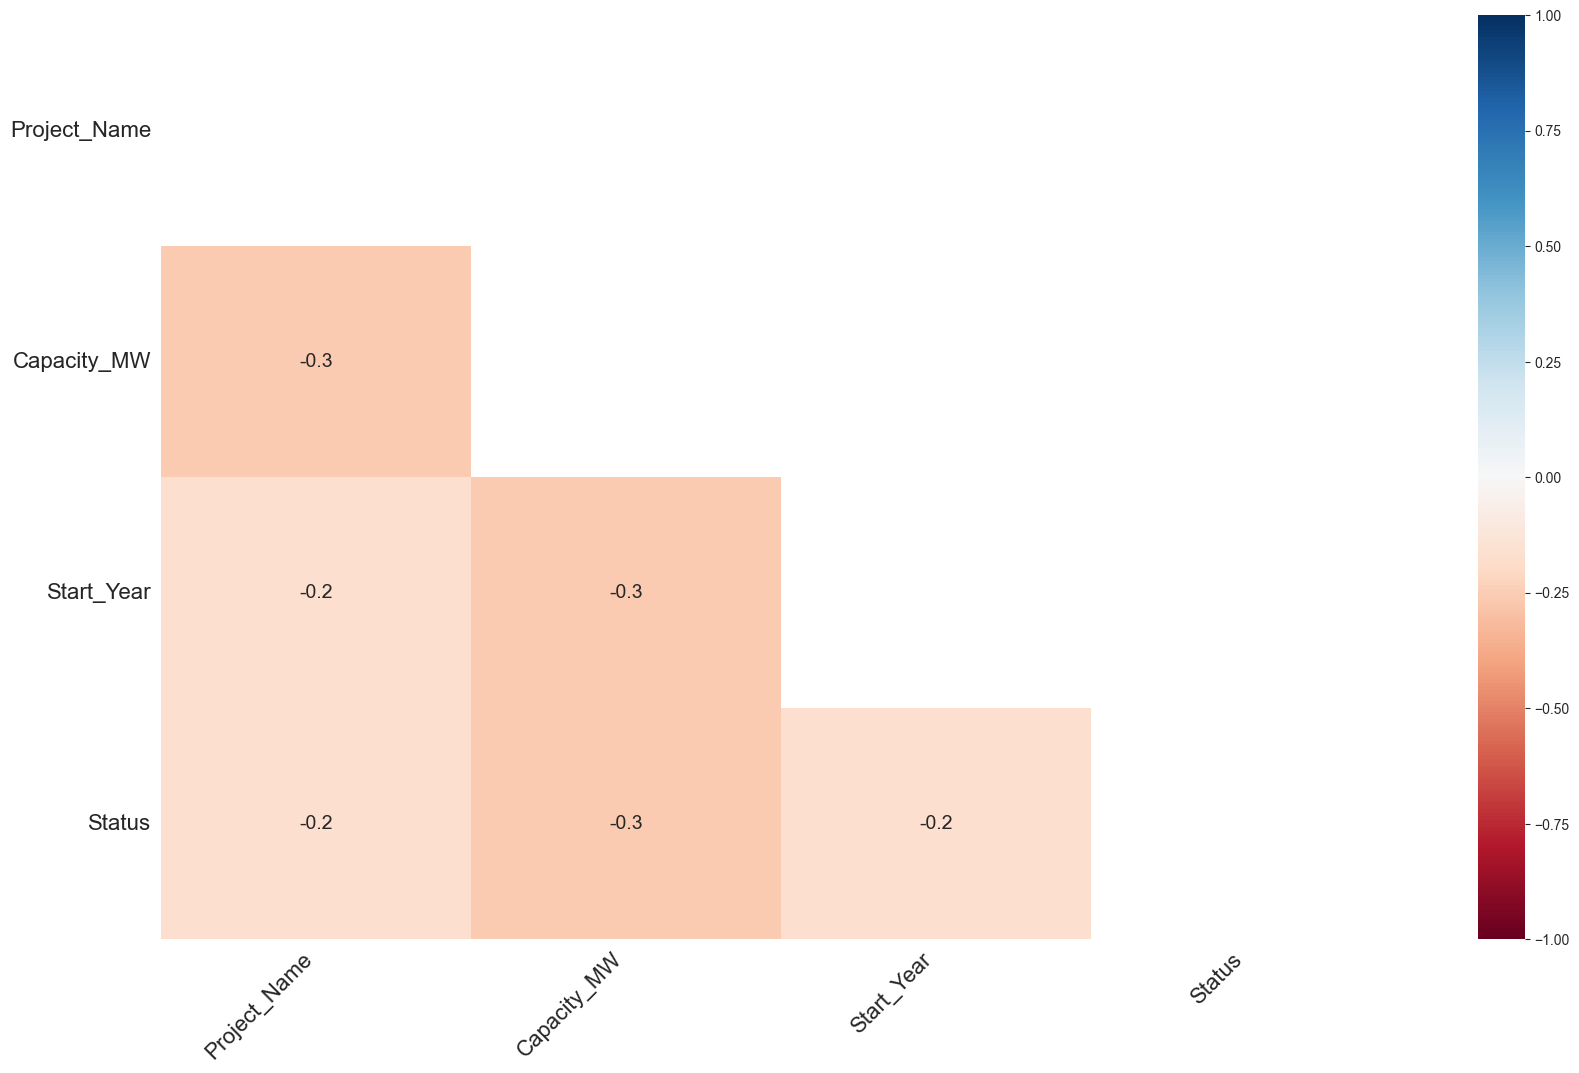

In [19]:
msno.matrix(df)
msno.heatmap(df)

#### Strageties for handling missing values:

1. Remove missing data
If a small number of rows or columns have missing values, you might consider removing them from the dataset. this approach is suitable when the missing data is minimal and its removal won't significantly impact the dataset


In [20]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Drop columns with missing values
df_cleaned = df.dropna(axis=1)

2. Impute missing data
Imputation involves filling in missing values with a substitute value, such as median, mean, mode of the columns. This is useful when the missing data is more prevalent, but you don't want to lose information by removing rows or columns


In [4]:
df["Estimated_Cost_MillionUSD"] = df["Estimated_Cost_MillionUSD"].fillna(
    df["Estimated_Cost_MillionUSD"].mean()
)

df["CO2_Reduction_tons_per_year"] = df["CO2_Reduction_tons_per_year"].fillna(
    df["CO2_Reduction_tons_per_year"].median()
)


In [5]:
df.head()

,Project_ID,Project_Name,Country,Capacity_MW,Start_Year,Status,Estimated_Cost_MillionUSD,CO2_Reduction_tons_per_year
0,101,Kainji Solar Expansion,Nigeria,50.0,2020.0,Operational,75.0,30000.0
1,102,Lekki Wind Farm,Nigeria,NaN,2021.0,Under Construction,120.0,85000.0
2,103,Bauchi Biomass Plant,Nigeria,12.0,NaN,Planning,53.0,15000.0
3,104,Nasarawa Mini‑Hydro,Nigeria,5.0,2019.0,NaN,18.0,7000.0
4,105,Abuja Solar Rooftop Program,Nigeria,3.5,2023.0,Operational,5.0,30000.0


3. Forward or backward fill
Forward fill propagates the last valid observation forward, while the backward fill does the opposite. This is particularly useful in time series data where trends or sequences are important

In [ ]:
# # Forward fill
# df.fillna(method="ffill", inplace=True)
#
# # Backward fill
# df.fillna(method="bfill", inplace=True)


#### Manage Outliers
Outliers are data points that differ significantly from other observations. They can distort statistical analyses and negatively impact the performance of machine learning models.

#### Strategies for managing outliers

1. Identify outliers
This first step is to identify outliers, which can be done using statistical methods such as Z-scores or the interquartile Range(IQR).

In [7]:
import numpy as np
from scipy import stats

# ---- Z-SCORE OUTLIERS ----
z_scores = np.abs(stats.zscore(df["CO2_Reduction_tons_per_year"]))
z_outliers = df[z_scores > 3]

print("\nZ-Score Outliers:")
print(z_outliers)


# ---- IQR OUTLIERS ----
Q1 = df["CO2_Reduction_tons_per_year"].quantile(0.25)
Q3 = df["CO2_Reduction_tons_per_year"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[
    (df["CO2_Reduction_tons_per_year"] < lower_bound) |
    (df["CO2_Reduction_tons_per_year"] > upper_bound)
]

print("\nIQR Outliers:")
print(iqr_outliers)



Z-Score Outliers:
Empty DataFrame
Columns: [Project_ID, Project_Name, Country, Capacity_MW, Start_Year, Status, Estimated_Cost_MillionUSD, CO2_Reduction_tons_per_year]
Index: []

IQR Outliers:
   Project_ID     Project_Name  Country  Capacity_MW  Start_Year  \
1         102  Lekki Wind Farm  Nigeria          NaN      2021.0   

               Status  Estimated_Cost_MillionUSD  CO2_Reduction_tons_per_year  
1  Under Construction                      120.0                      85000.0  


2. Handle outliers

a. <u>Remove outliers :</u>
Outliers can be removed from the dataset if they are believed to be errors or not representatiive of the population

In [ ]:
# # Remove outliers identified by Z-score
# df_cleaned = df[(z_scores <= 3)]
#
# # Remove outliers identified by IQR
# df_cleaned = df[~((df["CO2_Reduction_tons_per_year"] < lower_bound) | ())]

b. <u>Cap or Transform outliers: </u> Instead of removing outliers, you might cap them to a certain threshold or transform them using logarithmic or other functions to reduce their impact

In [8]:
# Cap outliers to a threshold
df["CO2_Reduction_tons_per_year"] = np.where(df["CO2_Reduction_tons_per_year"] > upper_bound, upper_bound, df["CO2_Reduction_tons_per_year"])

# Log transform to reduce to impact of outliers
df["CO2_Reduction_tons_per_year"] = np.log(df["CO2_Reduction_tons_per_year"] + 1)

#### Normalization
Normalization or scaling is the process of adjusting the values of numeric columns in a dataset to a common scale, typically between zero and one. This is especially important for machine learning algorithms that rely on the magnitude of features such as gradient descent-based algorithms.

#### Methods of normalization
1. Min-max scaling:  This scales all numeric values in a column to a range between zero and one

In [9]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()
df["Capacity_MW"] = scaler.fit_transform(df[["Capacity_MW"]])

2. Z-score standardization : This scales the data so that it has a means of zero and a standard deviation of one. This methos is useful when you want to compare features with different units of scales

In [12]:
from sklearn.preprocessing import StandardScaler


scaler2 = StandardScaler()
df["Capacity_MW"] = scaler2.fit_transform(df[["Capacity_MW"]])

#### Data Transformation
Data Transformation involves converting data from one format or structure to another. This is often necessary to meet the assumptions of statistical models or to improve the performance of machine learning algorithms.

#### Common data transformations:
1. Logarithmic transformation: is usd to stabilize variance,, by making the data appear more like normal distribution and reducing the impact of outliers

In [13]:
df["Capacity_MW"] = np.log(df["Capacity_MW"] + 1 ) # Adding 1 to avoid log(0)


2. Box-Cox Transformation : is used to stabilize variance and make the data more normally distributed

In [15]:
from scipy import stats

df["CO2_Reduction_tons_per_year"], _= stats.boxcox(df["CO2_Reduction_tons_per_year"] + 1)

3. Binning : also called discretization, involves converting continuous variables into discrete categories

In [16]:
df["CO2_Reduction_tons_per_year"] = pd.cut(df["CO2_Reduction_tons_per_year"], bins=[0, 10, 20, 30],
                                           labels=['Low', 'Medium', 'High'])

4. Encoding categorical variables : this involves transforming categorical data into numerical format, which is necessary for many machine learning algorithms

In [17]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=["Status"])

Automate the workflow

In [22]:
# def load_data(filepath):
#     return pd.read_csv(filepath)
#
# def handle_missing_values(df):
#     return df.fillna(df.mean())
#
# def remove_outliers(df):
#     z_scores = np.abs(stats.zscore(df))
#     return df[(z_scores > 3).all(axis=1)]
#
# def scale_data(df):
#     scaler = StandardScaler()
#     return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#
# def encode_categorical(df, categorical_columns):
#     return pd.get_dummies(df, columns=categorical_columns)
#
# def save_date(df, output_path):
#     df.to_csv(output_path, index=False)
#
#
# # Example of usage:
# df = load_data("employee_data.csv")
# df = handle_missing_values(df)
# df = remove_outliers(df)
# df = scale_data(df)
# df = encode_categorical(df, ["gender"])
# save_date(df, "employee_data_cleaned.csv")
#
